<a href="https://colab.research.google.com/github/SanjayBhargavKudupudi/DATA_MINING_ASSIGNMENT_3/blob/main/KDD/KDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
path = "/content/drive/MyDrive/DATA_MINING_DATASETS/youtubers_df.csv"
youtubers_df = pd.read_csv(path)

In [3]:
# Check for missing values in the dataset
missing_values = youtubers_df.isnull().sum()

missing_values


Rank            0
Username        0
Categories    306
Suscribers      0
Country         0
Visits          0
Likes           0
Comments        0
Links           0
dtype: int64

In [4]:
# Fill missing values in 'Categories' with 'Unknown'
youtubers_df['Categories'].fillna('Unknown', inplace=True)

# Drop columns that might not be necessary for our regression task
youtubers_df.drop(columns=['Rank', 'Username', 'Links'], inplace=True)

# Display the cleaned dataset
youtubers_df.head()


,Categories,Suscribers,Country,Visits,Likes,Comments
0,Música y baile,249500000.0,India,86200.0,2700.0,78.0
1,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0
2,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0
3,Unknown,162600000.0,India,15600.0,166.0,9.0
4,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0


In [8]:
# Check the data types of each column
data_types = youtubers_df.dtypes

data_types


Categories     object
Suscribers    float64
Country        object
Visits        float64
Likes         float64
Comments      float64
dtype: object

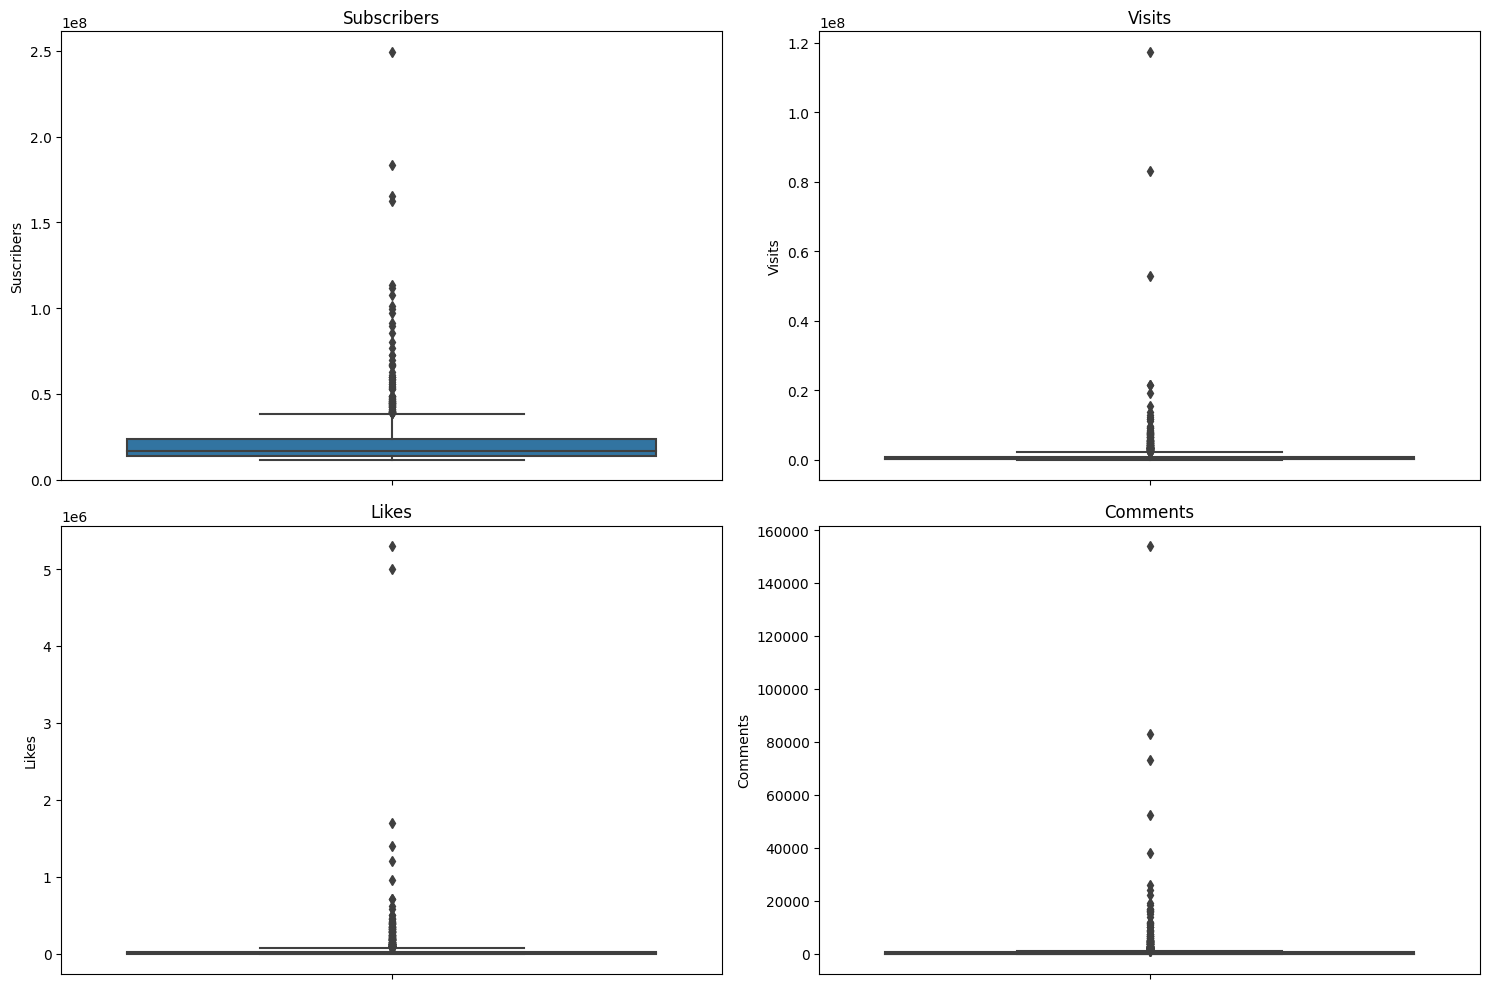

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot boxplots for the numeric columns
sns.boxplot(y=youtubers_df['Suscribers'], ax=axs[0, 0]).set_title('Subscribers')
sns.boxplot(y=youtubers_df['Visits'], ax=axs[0, 1]).set_title('Visits')
sns.boxplot(y=youtubers_df['Likes'], ax=axs[1, 0]).set_title('Likes')
sns.boxplot(y=youtubers_df['Comments'], ax=axs[1, 1]).set_title('Comments')

# Adjust layout
plt.tight_layout()
plt.show()


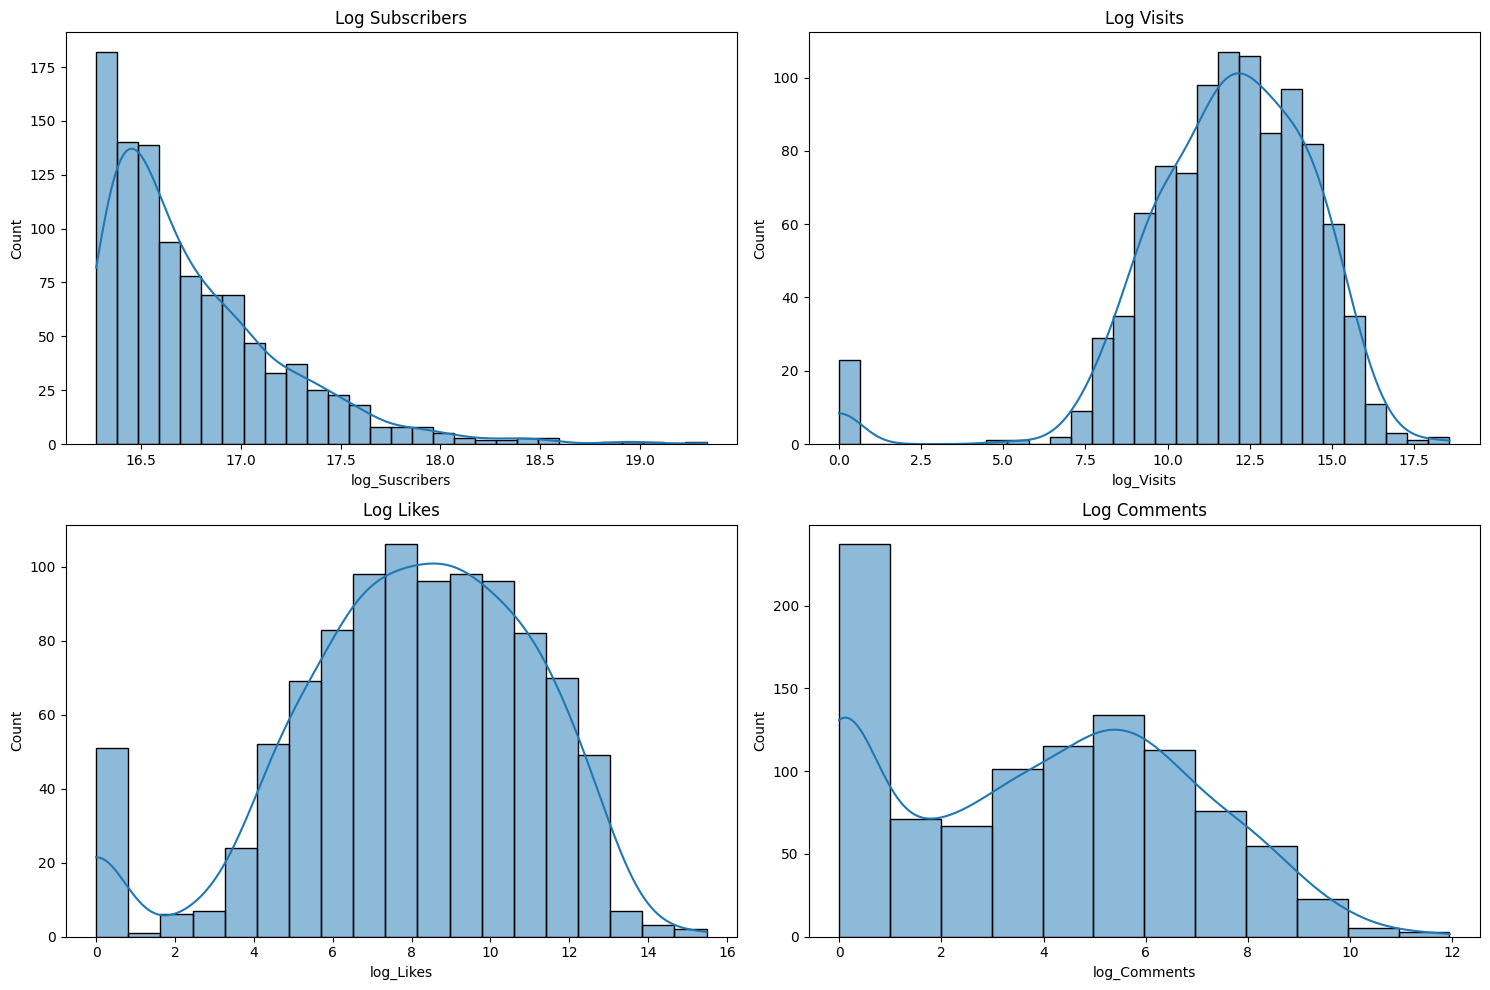

In [10]:
import numpy as np

# Apply log transformation to the numeric columns (adding 1 to avoid log(0))
youtubers_df['log_Suscribers'] = np.log1p(youtubers_df['Suscribers'])
youtubers_df['log_Visits'] = np.log1p(youtubers_df['Visits'])
youtubers_df['log_Likes'] = np.log1p(youtubers_df['Likes'])
youtubers_df['log_Comments'] = np.log1p(youtubers_df['Comments'])

# Visualize the distributions of the log-transformed columns
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(youtubers_df['log_Suscribers'], ax=axs[0, 0], kde=True).set_title('Log Subscribers')
sns.histplot(youtubers_df['log_Visits'], ax=axs[0, 1], kde=True).set_title('Log Visits')
sns.histplot(youtubers_df['log_Likes'], ax=axs[1, 0], kde=True).set_title('Log Likes')
sns.histplot(youtubers_df['log_Comments'], ax=axs[1, 1], kde=True).set_title('Log Comments')

plt.tight_layout()
plt.show()


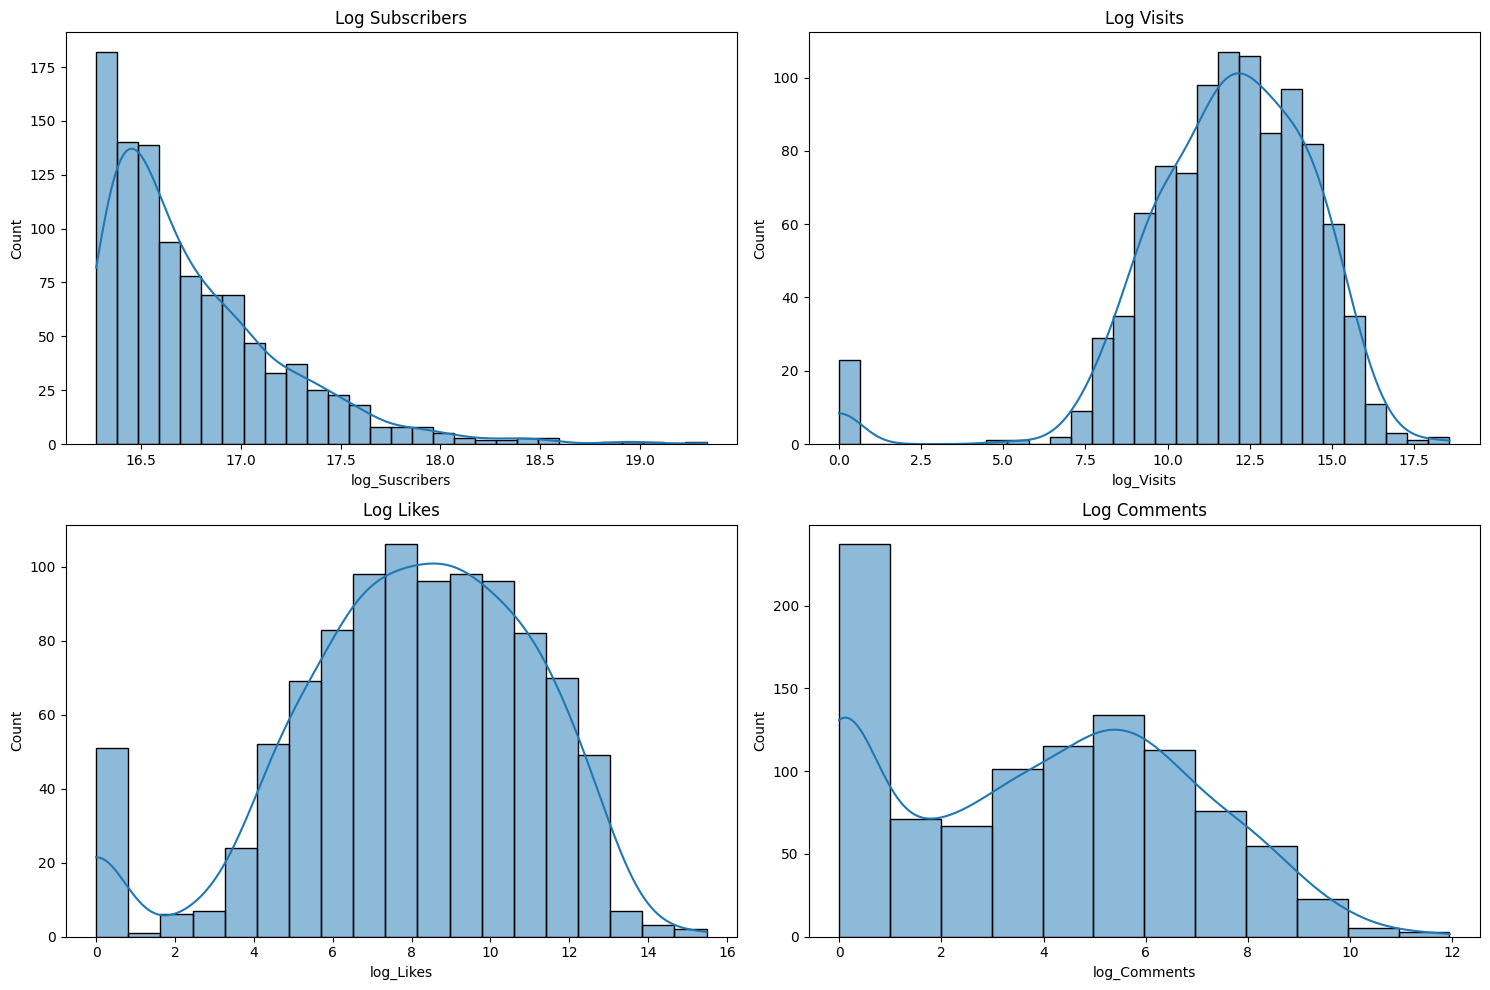

In [11]:
import numpy as np

# Apply log transformation to the numeric columns (adding 1 to avoid log(0))
youtubers_df['log_Suscribers'] = np.log1p(youtubers_df['Suscribers'])
youtubers_df['log_Visits'] = np.log1p(youtubers_df['Visits'])
youtubers_df['log_Likes'] = np.log1p(youtubers_df['Likes'])
youtubers_df['log_Comments'] = np.log1p(youtubers_df['Comments'])

# Visualize the distributions of the log-transformed columns
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(youtubers_df['log_Suscribers'], ax=axs[0, 0], kde=True).set_title('Log Subscribers')
sns.histplot(youtubers_df['log_Visits'], ax=axs[0, 1], kde=True).set_title('Log Visits')
sns.histplot(youtubers_df['log_Likes'], ax=axs[1, 0], kde=True).set_title('Log Likes')
sns.histplot(youtubers_df['log_Comments'], ax=axs[1, 1], kde=True).set_title('Log Comments')

plt.tight_layout()
plt.show()


In [13]:
# Fit the KMeans algorithm again with the optimal number of clusters (k=3)
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)

# Assign each YouTuber to a cluster
youtubers_df['Cluster'] = kmeans.labels_

# Check the distribution of YouTubers across the clusters
cluster_distribution = youtubers_df['Cluster'].value_counts().sort_index()

cluster_distribution


NameError: ignored